<img src='https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Foundations of Data Science <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
<font color=3C99D size=5>
    Project: Financial Analysis on Twitter <br>
<font color=696880 size=4>
    Parishad Mokhber - 98100537 <br>
    
____

# Part 2: Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('training.1600000.processed.noemoticon.csv',  
                 names=['label', 'id', 'date', 'query', 'user', 'tweet'], encoding = "ISO-8859-1")

In [2]:
df.head()

,label,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.tail()

,label,id,date,query,user,tweet
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# Cleaning the data

In [4]:
# Remove unneccessary columns
df = df.drop(columns=['id', 'date', 'query', 'user'])

# Replace 4 labels with 1s
df.label.replace({0: 0, 4: 1}, inplace=True)
df.label.value_counts()

label
0    800000
1    800000
Name: count, dtype: int64

In [5]:
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
def clean_data(df):
    df = df.drop_duplicates()
    print("Number of nulls before cleaning:")
    print(df.isnull().sum())
    df = df.dropna(subset=['label', 'tweet'])
    df['tweet'] = df['tweet'].str.lower()
    print("Number of nulls after cleaning:")
    print(df.isnull().sum())

    return df


df = clean_data(df)
df.head(10)

Number of nulls before cleaning:
label    0
tweet    0
dtype: int64
Number of nulls after cleaning:
label    0
tweet    0
dtype: int64


,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@kwesidei not the whole crew
6,0,need a hug
7,0,@loltrish hey long time no see! yes.. rains a...
8,0,@tatiana_k nope they didn't have it
9,0,@twittera que me muera ?


# Feature Extraction

In [7]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming/Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['tweet'] = df['tweet'].apply(preprocess_text)

# Creating a pipeline for Bag of Words
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=1000)),
])

# Creating a pipeline for TF-IDF
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=1000)),
])

bow_features = bow_pipeline.fit_transform(df['tweet'])
tfidf_features = tfidf_pipeline.fit_transform(df['tweet'])


[nltk_data] Downloading package punkt to /home/alireza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alireza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Supervised Models

In [8]:
from sklearn.model_selection import train_test_split

X_tfidf = tfidf_features
X_bow = bow_features
y = df['label']


# BOW X & y
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state=42) 

#TF-IDF X & y
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_t, y_train_t, test_size=0.25, random_state=42) 

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from torch.optim import AdamW
import tqdm
import pickle

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_dims = [500, 50]):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], 1)
        self.activation = nn.GELU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x
        


def train_mlp(model, train_loader, val_loader, PATH, num_epochs=20, learning_rate=1e-3):
    
    loss_train, loss_val, accuracy_train, accuracy_val = [], [], [], []
    model.to(device)
    criterion = nn.BCELoss()
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    
    best_acc = 0
    for epoch in tqdm.tqdm(range(num_epochs)):
        model.train() 
        total_loss, total_correct, total_samples = 0, 0, 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze() 
            loss = criterion(outputs, labels)
            predicted = outputs.round()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        avg_train_loss = total_loss / len(train_loader)
        train_accuracy = total_correct / total_samples
        loss_train.append(avg_train_loss)
        accuracy_train.append(train_accuracy)

        # Validation phase
        model.eval() 
        total_val_loss, total_val_correct, total_val_samples = 0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels)
                predicted = outputs.round()

                total_val_loss += loss.item()
                total_val_correct += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = total_val_correct / total_val_samples
        loss_val.append(avg_val_loss)
        accuracy_val.append(val_accuracy)
        
        if val_accuracy > best_acc:
            torch.save(model.state_dict(), PATH)
            best_acc = val_accuracy

        # print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Acc: {val_accuracy:.4f}")

    return model, loss_train, loss_val, accuracy_train, accuracy_val

## TF-IDF

In [17]:
scaler = StandardScaler()
X_train_scaled_t = scaler.fit_transform(X_train_t.toarray()) 
X_val_scaled_t = scaler.transform(X_val_t.toarray())

train_data = TensorDataset(torch.tensor(X_train_scaled_t, dtype=torch.float32), torch.tensor(y_train_t.values, dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val_scaled_t, dtype=torch.float32), torch.tensor(y_val_t.values, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=264, shuffle=True, num_workers=8)
val_loader = DataLoader(val_data, batch_size=264, shuffle=False, num_workers=8)

#### MLP

100%|███████████████████████████████████████████| 20/20 [06:34<00:00, 19.71s/it]


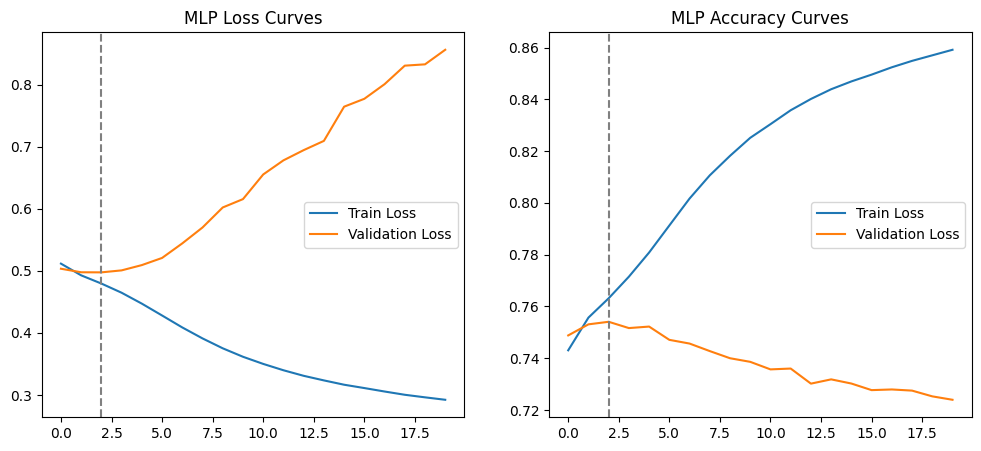

MLP Max Validation Accuracy: 0.7541


In [18]:
mlp = MLP(input_size=X_train_scaled_t.shape[1]).to(device)
model, loss_train, loss_val, accuracy_train, accuracy_val = train_mlp(mlp, train_loader, val_loader, 'MLP_TFIDF.pth')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(loss_train, label='Train Loss')
axs[0].plot(loss_val, label='Validation Loss')
axs[0].set_title('MLP Loss Curves')
axs[0].legend()

axs[1].plot(accuracy_train, label='Train Loss')
axs[1].plot(accuracy_val, label='Validation Loss')
axs[1].set_title('MLP Accuracy Curves')
axs[1].legend()

max_val_accuracy_epoch = accuracy_val.index(max(accuracy_val))
# Add vertical line for the epoch with the highest validation accuracy
axs[0].axvline(x=max_val_accuracy_epoch, color='gray', linestyle='--')
axs[1].axvline(x=max_val_accuracy_epoch, color='gray', linestyle='--')
plt.show()

print(f"MLP Max Validation Accuracy: {max(accuracy_val):.4f}")

#### CatBoost

In [22]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    task_type='GPU', 
    devices='0:1',
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function='Logloss'
)

# train_pool = Pool(X_train_scaled_t, label=y_train_t)
# val_pool = Pool(X_val_scaled_t, label=y_val_t)

model.fit(X_train_scaled_t, y_train_t, verbose=3)

val_predictions = model.predict(X_val_scaled_t)
val_accuracy = sum(y_val_t == val_predictions) / len(y_val_t)

0:	learn: 0.6862374	total: 18.2ms	remaining: 1.8s
3:	learn: 0.6730805	total: 66.4ms	remaining: 1.59s
6:	learn: 0.6642170	total: 114ms	remaining: 1.52s
9:	learn: 0.6571401	total: 157ms	remaining: 1.41s
12:	learn: 0.6509363	total: 199ms	remaining: 1.33s
15:	learn: 0.6455667	total: 237ms	remaining: 1.24s
18:	learn: 0.6409981	total: 274ms	remaining: 1.17s
21:	learn: 0.6366109	total: 311ms	remaining: 1.1s
24:	learn: 0.6331016	total: 348ms	remaining: 1.04s
27:	learn: 0.6298263	total: 384ms	remaining: 989ms
30:	learn: 0.6268397	total: 421ms	remaining: 936ms
33:	learn: 0.6237596	total: 457ms	remaining: 887ms
36:	learn: 0.6211755	total: 493ms	remaining: 839ms
39:	learn: 0.6187019	total: 529ms	remaining: 794ms
42:	learn: 0.6165370	total: 566ms	remaining: 750ms
45:	learn: 0.6141114	total: 602ms	remaining: 706ms
48:	learn: 0.6120699	total: 638ms	remaining: 664ms
51:	learn: 0.6101616	total: 674ms	remaining: 622ms
54:	learn: 0.6082750	total: 710ms	remaining: 581ms
57:	learn: 0.6064356	total: 748ms	r

In [25]:
print(f"CatBoost Validation Accuracy: {val_accuracy}.4f")

with open('catboost_TFIDF.pkl', 'wb') as file:
    pickle.dump(model, file)

CatBoost Validation Accuracy: 0.7021


#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_scaled_t, y_train_t)

val_predictions = model.predict(X_val_scaled_t)
val_accuracy = sum(y_val_t == val_predictions) / len(y_val_t)

print(f"Logistic Regression Validation Accuracy: {val_accuracy:.4f}")

with open('logistic_TFIDF.pkl', 'wb') as file:
    pickle.dump(model, file)

Logistic Regression Validation Accuracy: 0.7457


## Bag of Words

In [21]:
scaler = StandardScaler()
X_train_scaled_b = scaler.fit_transform(X_train_b.toarray()) 
X_val_scaled_b = scaler.transform(X_val_b.toarray())

train_data = TensorDataset(torch.tensor(X_train_scaled_b, dtype=torch.float32), torch.tensor(y_train_b.values, dtype=torch.float32))
val_data = TensorDataset(torch.tensor(X_val_scaled_b, dtype=torch.float32), torch.tensor(y_val_b.values, dtype=torch.float32))

train_loader = DataLoader(train_data, batch_size=264, shuffle=True, num_workers=8)
val_loader = DataLoader(val_data, batch_size=264, shuffle=False, num_workers=8)

mlp = MLP(input_size=X_train_scaled_b.shape[1]).to(device)

#### MLP

100%|███████████████████████████████████████████| 20/20 [06:36<00:00, 19.84s/it]


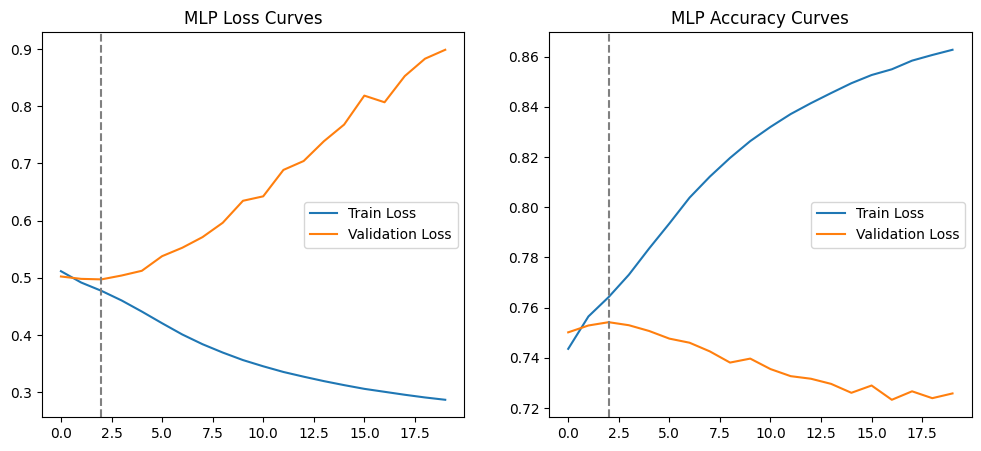

MLP Max Validation Accuracy: 0.7542


In [23]:
model, loss_train, loss_val, accuracy_train, accuracy_val = train_mlp(mlp, train_loader, val_loader, 'MLP_BOW.pth')

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(loss_train, label='Train Loss')
axs[0].plot(loss_val, label='Validation Loss')
axs[0].set_title('MLP Loss Curves')
axs[0].legend()

axs[1].plot(accuracy_train, label='Train Loss')
axs[1].plot(accuracy_val, label='Validation Loss')
axs[1].set_title('MLP Accuracy Curves')
axs[1].legend()

max_val_accuracy_epoch = accuracy_val.index(max(accuracy_val))
# Add vertical line for the epoch with the highest validation accuracy
axs[0].axvline(x=max_val_accuracy_epoch, color='gray', linestyle='--')
axs[1].axvline(x=max_val_accuracy_epoch, color='gray', linestyle='--')
plt.show()

print(f"MLP Max Validation Accuracy: {max(accuracy_val):.4f}")

#### CatBoost

In [ ]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    task_type='GPU', 
    devices='0:1',
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function='Logloss'
)

train_pool = Pool(X_train_scaled_b, label=y_train_b)
val_pool = Pool(X_val_scaled_b, label=y_val_b)

model.fit(train_pool, eval_set=val_pool, verbose=3)

val_predictions = model.predict(val_pool)
val_accuracy = sum(y_val_b == val_predictions) / len(y_val_b)

print(f"CatBoost Validation Accuracy: {val_accuracy:.4f}")

with open('catboost_BOW.pkl', 'wb') as file:
    pickle.dump(model, file)

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train_scaled_b, y_train_b)

val_predictions = model.predict(X_val_scaled_b)
val_accuracy = sum(y_val_b == val_predictions) / len(y_val_b)

print(f"Logistic Regression Validation Accuracy: {val_accuracy:.4f}")

with open('logistic_BOW.pkl', 'wb') as file:
    pickle.dump(model, file)

Logistic Regression Validation Accuracy: 0.7453


## Hyperparameter Tuning

#### Logistic Regression

In [26]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

param_distributions = {
    'C': np.logspace(-4, 4, 5),
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'max_iter': [200, 300, 500]
}

random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=3, verbose=0, random_state=42, n_jobs=-1)

# Fit Random Search
random_search.fit(X_train_scaled_b, y_train_b)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: User

[CV] END C=9.999999999999999e-05, max_iter=300, penalty=elasticnet, solver=liblinear; total time=  36.1s
[CV] END C=1.0, max_iter=200, penalty=elasticnet, solver=liblinear; total time=  37.6s
[CV] END C=100.0, max_iter=300, penalty=none, solver=liblinear; total time=  37.5s
[CV] END C=1.0, max_iter=200, penalty=elasticnet, solver=liblinear; total time=  37.4s
[CV] END C=9.999999999999999e-05, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=  37.5s
[CV] END C=1.0, max_iter=200, penalty=elasticnet, solver=liblinear; total time=  37.9s
[CV] END C=10000.0, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=  37.7s
[CV] END C=100.0, max_iter=300, penalty=none, solver=liblinear; total time=  37.9s
[CV] END C=100.0, max_iter=300, penalty=none, solver=liblinear; total time=  37.8s
[CV] END C=10000.0, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=  38.3s
[CV] END C=9.999999999999999e-05, max_iter=300, penalty=elasticnet, solver=liblinear; total time=  38.5s
[CV] 

/home/alireza/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alireza/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alireza/.local/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alireza/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 

Best parameters: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 500, 'C': 0.01}
Best score: 0.7446164758675414


In [27]:
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

with open('logistic_BOW.pkl', 'wb') as file:
    pickle.dump(random_search.best_estimator_, file)

Best parameters: {'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 500, 'C': 0.01}
Best score: 0.7446164758675414
[CV] END .....C=1.0, max_iter=500, penalty=none, solver=saga; total time=11.6min
[CV] END .....C=1.0, max_iter=500, penalty=none, solver=saga; total time=11.8min
[CV] END .....C=1.0, max_iter=500, penalty=none, solver=saga; total time=12.4min


## Test Set Results

In [33]:
mlp_bow = MLP(input_size=X_train_scaled_b.shape[1]).to(device)
mlp_bow.load_state_dict(torch.load('MLP_BOW.pth'))
    
X_test_scaled_b = scaler.transform(X_test_b.toarray())
test_data = TensorDataset(torch.tensor(X_test_scaled_b, dtype=torch.float32), torch.tensor(y_test_b.values, dtype=torch.float32))

test_loader = DataLoader(test_data, batch_size=264, shuffle=False, num_workers=8)

mlp_bow.eval() 
total_test_correct, total_test_samples = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mlp_bow(inputs).squeeze()
        predicted = outputs.round()

        total_test_correct += (predicted == labels).sum().item()
        total_test_samples += labels.size(0)

mlp_bow_test_accuracy = total_test_correct / total_test_samples

print(f'MLP-BOW Test Accuracy:{mlp_bow_test_accuracy:.4f}')

MLP-BOW Test Accuracy:0.7551


In [35]:
with open('logistic_BOW.pkl', 'rb') as file:
    logistic_BOW = pickle.load(file)
    
test_predictions = logistic_BOW.predict(X_test_scaled_b)
test_accuracy = sum(y_test_b == test_predictions) / len(y_test_b)

print(f"Logistic Regression Test Accuracy: {val_accuracy:.4f}")

Logistic Regression Test Accuracy: 0.7453


# Pre-Trained Bert Model

In [39]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment").to(device)

In [57]:
model.eval()
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=1)

def categorize_sentiment(sentiment):
    stars = int(sentiment['label'][0]) 
    if stars >= 4:
        return 1
    elif stars <= 3:
        return 0

# Function to apply sentiment analysis
def get_sentiment(text):
    return categorize_sentiment(nlp(text)[0])


subset_df = df.sample(n=20000)
subset_df['bert_sentiment'] = subset_df['tweet'].apply(lambda x: get_sentiment(x))

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/base.py:1080: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


In [58]:
subset_df.head()

,label,tweet,bert_sentiment
1140586,1,lbi night . work tomorrow beach til tuesday,1
1468447,1,person jackson rathbone ( jasper ) would worry...,0
629324,0,"awake 4.30 , awake middle night",0
447582,0,"@ shaysevenfold lmfao , tweetdeck give boner w...",0
1356064,1,"'ve got two photo booth gig weekend , one leba...",1


In [60]:
accuracy = (subset_df['label'] == subset_df['bert_sentiment']).mean()
print(f"Pre-trained Bert Accuracy: {accuracy:.3f}")

Pre-trained Bert Accuracy: 0.670


# Fine-Tune HuggingFace Model

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split

class TweetDataset(Dataset):
    def __init__(self, tweets, labels, tokenizer, max_len):
        self.tweets = tweets
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.tweets)

    def __getitem__(self, item):
        tweet = str(self.tweets[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            tweet,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'tweet_text': tweet,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
df_train, df_val = train_test_split(df.sample(frac=0.5), test_size=0.3, random_state=42)

max_len = 128  # Max length of tokens
train_dataset = TweetDataset(
    tweets=df_train.tweet.to_numpy(),
    labels=df_train.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
)

val_dataset = TweetDataset(
    tweets=df_val.tweet.to_numpy(),
    labels=df_val.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
)

In [6]:
from torch.utils.data import DataLoader
import tqdm

batch_size = 128

train_data_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    num_workers=8
)

val_data_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    num_workers=8
)

In [7]:
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.to(device).train()
    losses = []
    accuracies = []
    correct_predictions = 0
    for d in tqdm.tqdm(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs[0]
        logits = outputs[1]
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        accuracies.append(torch.sum(preds == labels)/len(data_loader))

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, accuracies, losses


def val_epoch(model, data_loader, device, n_examples):
    model = model.to(device).eval()
    losses = []
    accuracies = []
    correct_predictions = 0

    for d in tqdm.tqdm(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        loss = outputs[0]
        logits = outputs[1]
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        accuracies.append(torch.sum(preds == labels)/len(data_loader))
        

    return correct_predictions.double() / n_examples, accuracies, losses

In [8]:
from transformers import BertForSequenceClassification, AdamW
from torch.optim import lr_scheduler
import torch.nn as nn
import torch
import warnings
warnings.filterwarnings("ignore")

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=1e-4, correct_bias=False)

scheduler = lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

model

2024-02-06 19:45:30.550472: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-06 19:45:30.602275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 19:45:30.602305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 19:45:30.603915: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 19:45:30.613660: I tensorflow/core/platform/cpu_feature_guar

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [9]:
train_accs, val_accs = [], []
train_losses, val_losses = [], []

best_acc = 0

epochs = 3 #Number of epochs to fine-tune
for epoch in range(epochs):
    acc_train_epoch, train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler,
        len(df_train)
    )
    print(f'Train loss {np.mean(train_loss)} accuracy {acc_train_epoch}')
    train_accs.append(train_acc)
    train_losses.append(train_loss)
    
    acc_val_epoch, val_acc, val_loss = val_epoch(
        model,
        val_data_loader,
        device,
        len(df_val)
    )
    print(f'Val loss {np.mean(val_loss)} accuracy {acc_val_epoch}')
    val_accs.append(val_acc)
    val_losses.append(val_loss)
    
    if acc_val_epoch > best_acc:
        torch.save(model.state_dict(), 'finetuned_bert.pth')
        best_acc = acc_val_epoch

  0%|                                                  | 0/4331 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Train loss 0.4547696478907436 accuracy 0.7978610551839103


  0%|                                                  | 0/1856 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Val loss 0.44578446724034587 accuracy 0.8072396170975863


  0%|                                                  | 0/4331 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Train loss 0.43326241647060404 accuracy 0.8138490182070099


  0%|                                                  | 0/1856 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Val loss 0.4459004873281409 accuracy 0.8072522458051643


  0%|                                                  | 0/4331 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Train loss 0.4332209243403657 accuracy 0.8140799434233219


  0%|                                                  | 0/1856 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting 

Val loss 0.44590048617201633 accuracy 0.8072522458051643


In [37]:
train_accs_list = [tensor.cpu().item() for sublist in train_accs for tensor in sublist]
val_accs_list = [tensor.cpu().item() for sublist in val_accs for tensor in sublist]

train_losses_list = [tensor for sublist in train_losses for tensor in sublist]
val_losses_list = [tensor for sublist in val_losses for tensor in sublist]

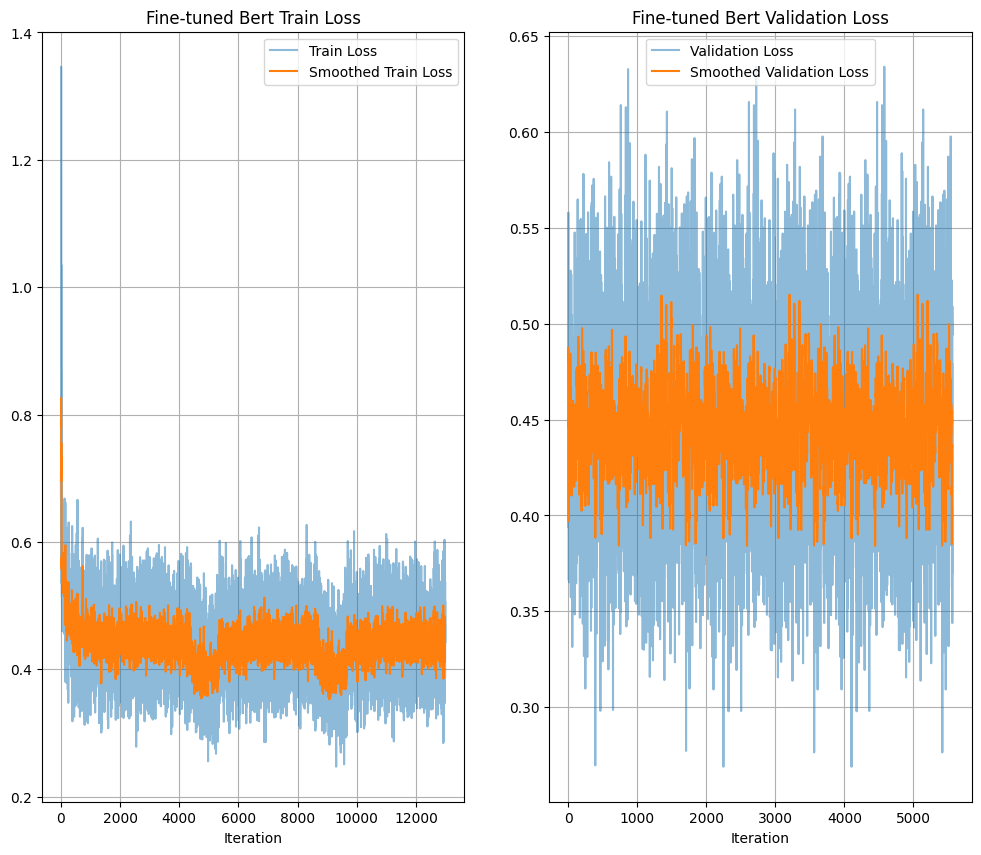

In [45]:
def smooth(data, window_width):
    """Smooth data by a simple moving average."""
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

# Set the window width for smoothing
window_width = 7

fig, axs = plt.subplots(1, 2, figsize=(12, 10))

# Train Loss
axs[0].plot(train_losses_list, label='Train Loss', alpha=0.5)
axs[0].plot(smooth(train_losses, window_width), label='Smoothed Train Loss')
axs[0].set_title('Fine-tuned Bert Train Loss')
axs[0].set_xlabel('Iteration')
axs[0].legend()
axs[0].grid()

# Validation Loss
axs[1].plot(val_losses_list, label='Validation Loss', alpha=0.5)
axs[1].plot(smooth(val_losses, window_width), label='Smoothed Validation Loss')
axs[1].set_title('Fine-tuned Bert Validation Loss')
axs[1].set_xlabel('Iteration')
axs[1].legend()
axs[1].grid()


plt.show()

In [47]:
print('Best Validation Accuracy for Fine-Tuned Bert Model:', acc_val_epoch.item())

Best Validation Accuracy for Fine-Tuned Bert Model: 0.8072522458051643


# Dicussion

As we can see from the results, the fine-tuned Bert model had the best results, even though it was only fine-tuned for 3 epochs and only used 50% of data as its dataset for training and validation. Yet, this model has a lot of computational complexity and its very expensive to compute.

The MLP classifier on the TD-IDF and BOW features also yeilded comparable results when trained on 1000 max features for each tweet. Other classifiers like CatBoost also yeilded good results. There were no significant difference between the performance of the models on the TF-IDF or BOW features, but BOW was slightly better.

However, the pretrained Bert model was not really satisfactory as the accuracy was lower than other models. Of course we need to note that this model was not trained on our dataset! so it can be used to fine-tune it on our dataset, as we did.

All in all, if we have enough computational power, fine-tuning the Bert or other state-of-the-art language models on our dataset is the best solution. But otherwise, extracting TF-IDF or BOW features and train small classifiers on them would be good enough.